In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

base_path = os.getcwd() 
file_name = "data/full_data.csv"
full_path = os.path.join(base_path, file_name)

data = pd.read_csv(full_path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We do not need id or the last feature (includes NaN values)...

In [ ]:
# clean data
df = data.drop(['id', 'Unnamed: 32'],axis = 1 )
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 31)

In [ ]:
# check if data is balanced
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)

diagnosis
0    357
1    212
Name: count, dtype: int64


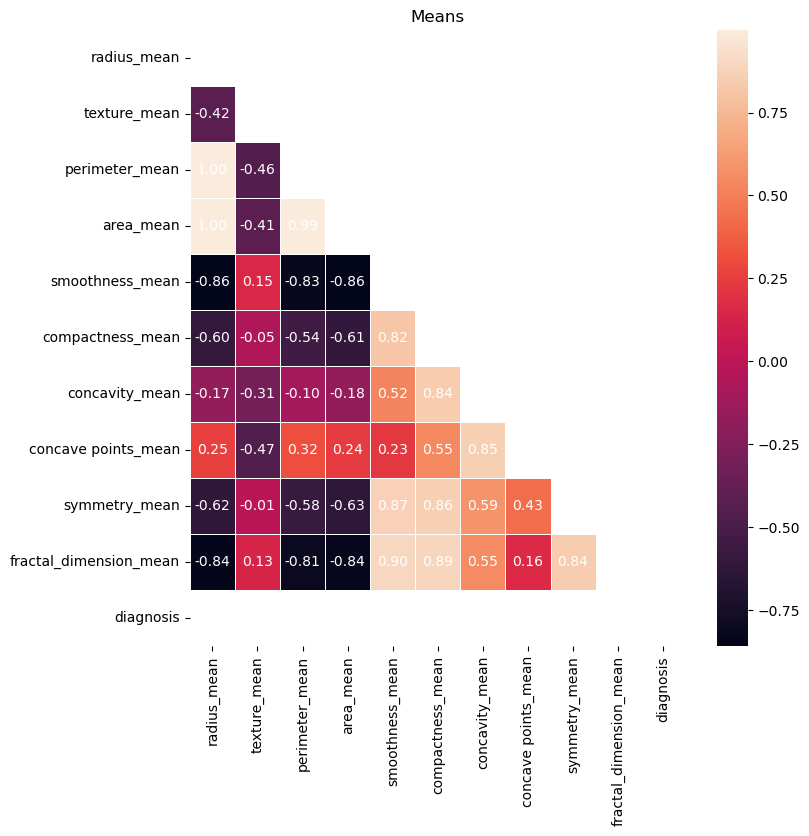

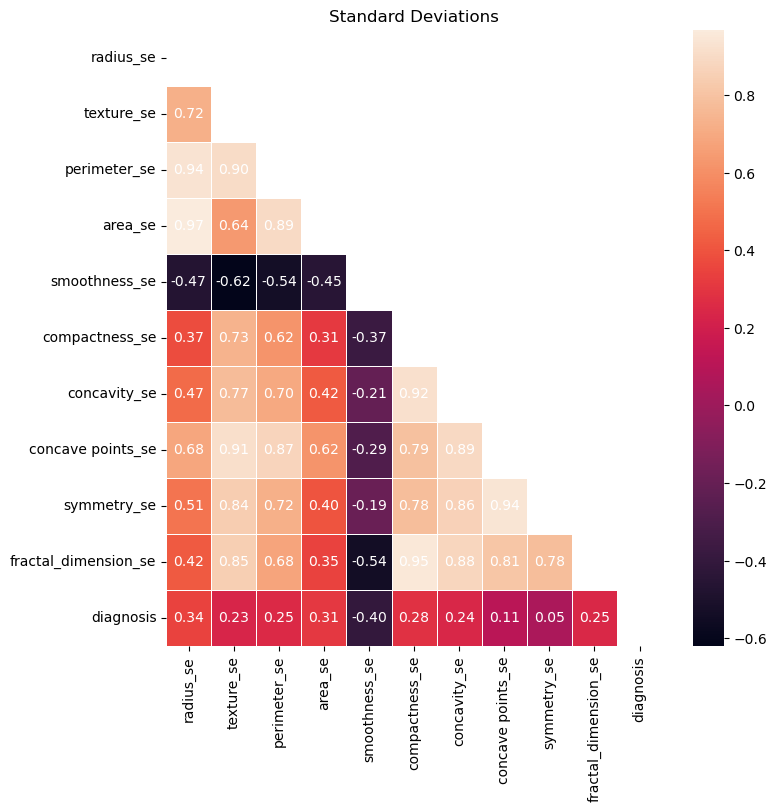

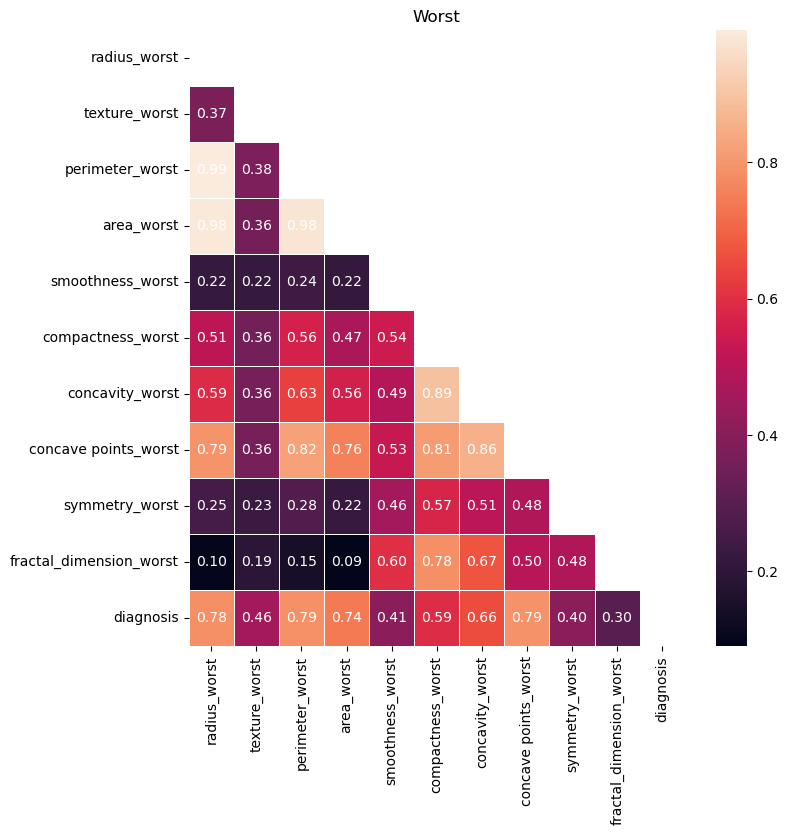

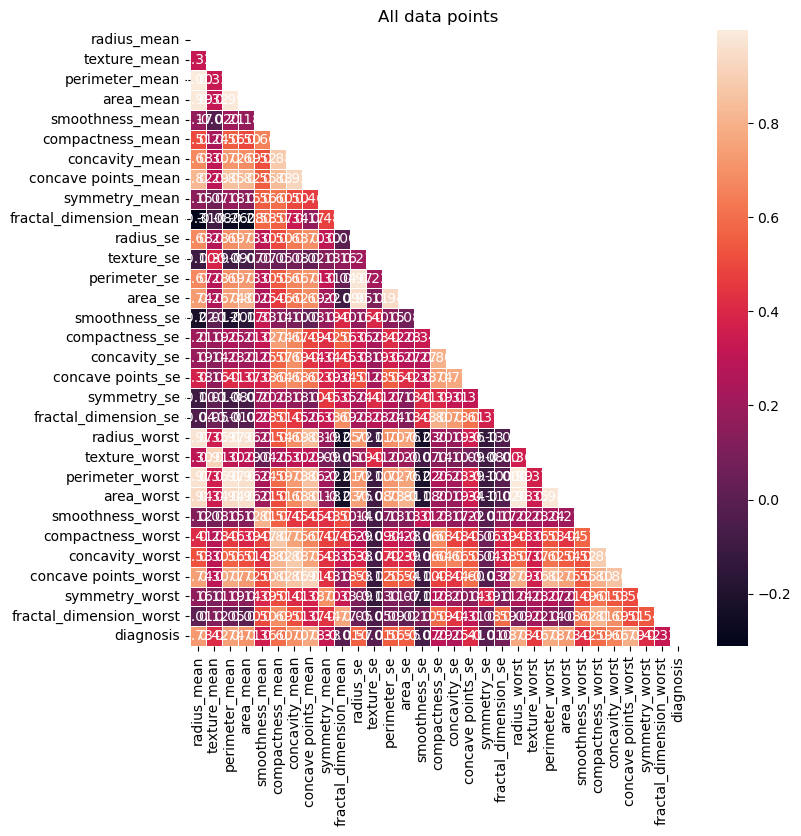

In [ ]:
y=df['diagnosis']
x=df.drop(labels = 'diagnosis',axis='columns')

# CORRELATION MATRIX
def correlation_matrix(x, y,  title):
    data = pd.concat([x,y], axis=1)
    corr_matrix = data.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    _,ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(corr_matrix, mask=mask, linewidths=.5, ax=ax)

    # adding annotations manually
    for i in range(corr_matrix.shape[0]):
        for j in range(i):
            plt.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='white')
    plt.title(title)
    plt.show()

correlation_matrix(x.iloc[0:10, 0:10],y[0:10], 'Means')
correlation_matrix(x.iloc[10:20, 10:20],y[10:20], 'Standard Deviations')
correlation_matrix(x.iloc[20::, 20::],y[20::], 'Worst')
correlation_matrix(x,y, 'All data points')




perimeter, area and radius are correlated for obvious reasons. We should only keep one of them
Even if they are calculated weirdly:
- radius: average of centroid to each point
- area: count of the pixels
- perimeter: just length of the 'snake'

the compactness measures how much the cell is a circle, and in circles all these three measures are mathematically related, so i don't think it makes sense to keep all three variables in.
If you look at the distribution of the (normalized) mean values of these variables they have the same distribution (if you look at violinplots).

MAYBE WE CAN LOOK AT HOW THE THREE VARIABLES ARE CORRELATED TO THE REST AND SEE WHICH ONES ARE THE WORST.
OR HONESTLY I THINK PCA IS THE WAY TO GO.


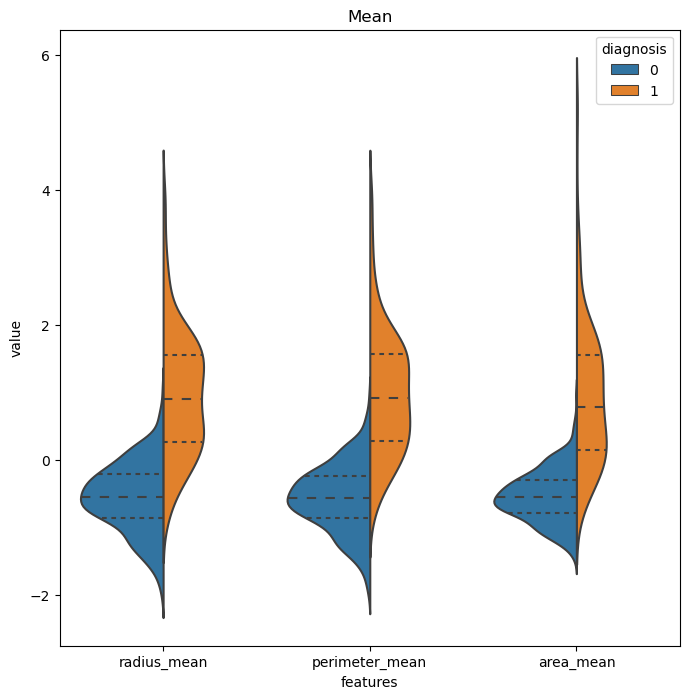

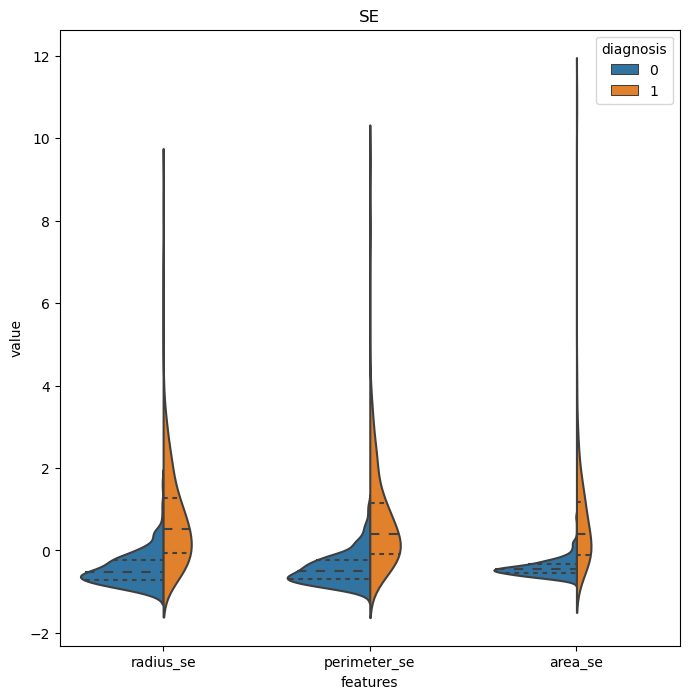

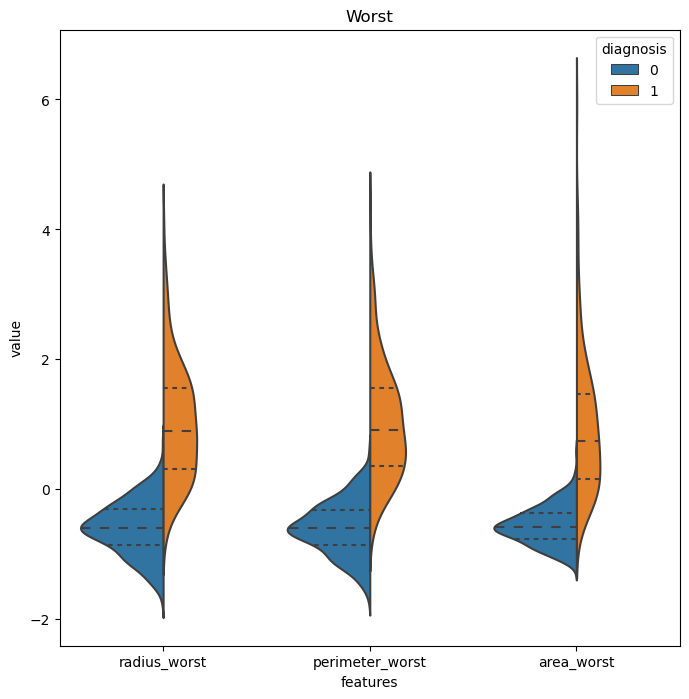

In [ ]:
# VIOLINPLOTS
def violinplots(df, selected_col, title):
    selected_df = df[selected_col]
    norm_df = (selected_df - selected_df.mean())/selected_df.std()
    corr_mean = pd.concat([df['diagnosis'], norm_df], axis=1)
    data = pd.melt(corr_mean,id_vars="diagnosis", var_name="features",
                        value_name='value')
    plt.figure(figsize=(8,8))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
    plt.title(title)
    plt.show()

column_mean = ['radius_mean', 'perimeter_mean', 'area_mean']
column_se = ['radius_se', 'perimeter_se', 'area_se']
column_worst = ['radius_worst', 'perimeter_worst', 'area_worst']

violinplots(df, column_mean, 'Mean')
violinplots(df, column_se, 'SE')
violinplots(df, column_worst, 'Worst')


summing it up:

Multicolinearity occur when the independent variables are correlated whith eachother. In our case there is a high correlation among perimeter, area and radius. This can be detrimental as it can easily lead to overfitting. 

it'spossible to remove features if multicolinearity is deteceted: 
- By removing highly correlated features, you can reduce dimensionality, improve model interpretability, and potentially enhance model performance by reducing noise and overfitting

- we can also try recursive feature elimination -> but honestly i think its a bit of an overshoot

- we can keep one variable and discard 2 of them or somehow comine their values (by averaging them, pca ...) -> i think in this case discrading two variables is the way to go because the other two variables can be generated with some kind of linear transformation on the data

- we should remove datapoints cause the features are redundant and make model more complex, increase dimensionality and harder to train (https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a)

- a feature can become 'unimportant ' because there are many other variables measuring the same thing -> impact of a variable is less important 

- the model is overfit :( it will do very well in training cause it learns the patterns but very poorly in testing

-  In general, an absolute correlation coefficient of >0.7 among two or more predictors indicates the presence of multicollinearity.

- Use Principal component analysis (also a dimensionality reduction technique) which is a statistical procedure to convert a set of possibly correlated predictors into a set of linearly uncorrelated variables.  I THINK THIS IS THE WAY TO GO AGAIN



We don't necessarely need to get rid of them:
- The L1 regularization forces some coefficients to zero, effectively performing feature selection
- The degree of multicollinearity greatly impacts the p-values and coefficients but not predictions and goodness-of-fit test. If your goal is to perform the predictions and not necessary to understand the significance of the independent variable, it is not a mandate to fix the multicollinearity issue. (https://towardsdatascience.com/how-to-detect-and-deal-with-multicollinearity-9e02b18695f1)

many people look at the variance inflation factor to determine if there is multicolinearity and to chose what factors to rempove

should we normalize or standardize (https://towardsdatascience.com/normalization-vs-standardization-explained-209e84d0f81e#:~:text=Well%2C%20that%20depends%20on%20the,nearest%20neighbor%20and%20neural%20networks) -> min max scaler or standard deviation one or maybe both(?)




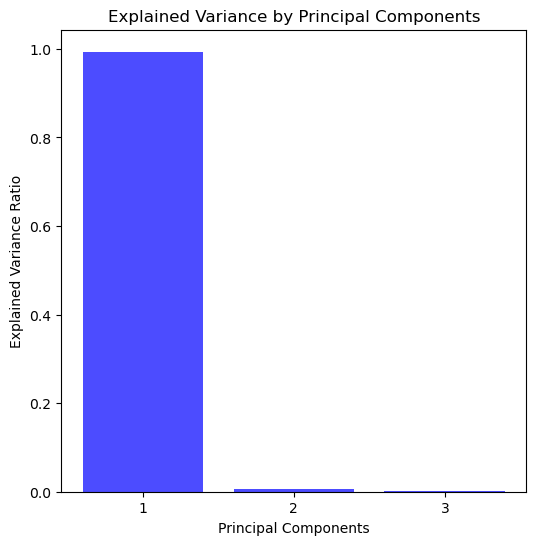

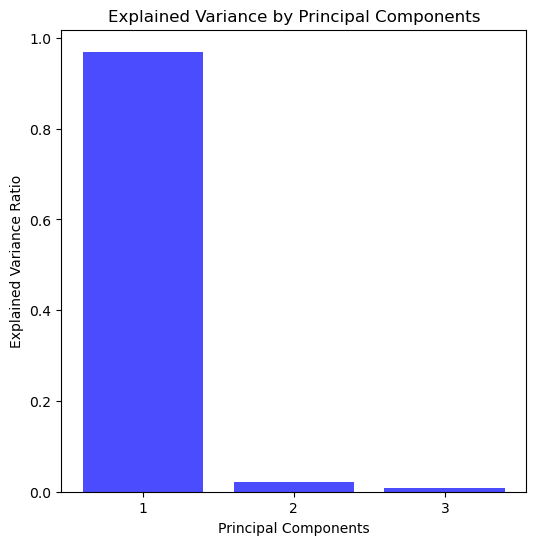

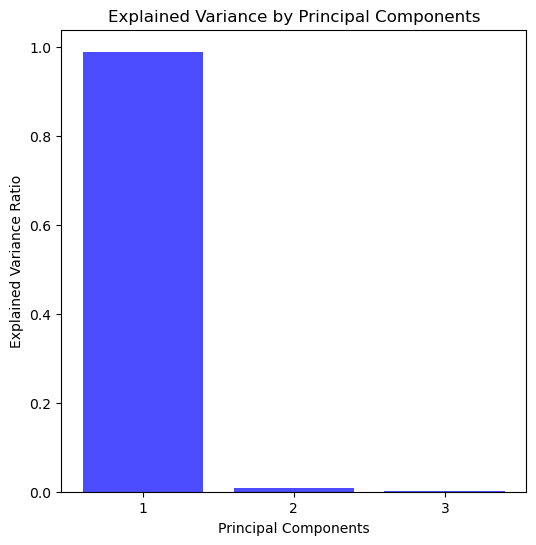

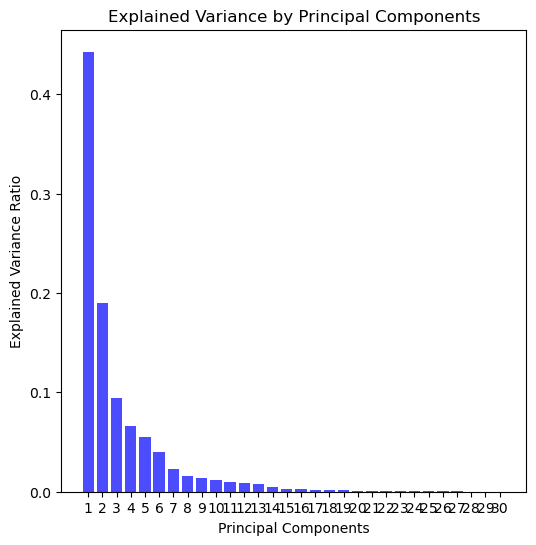

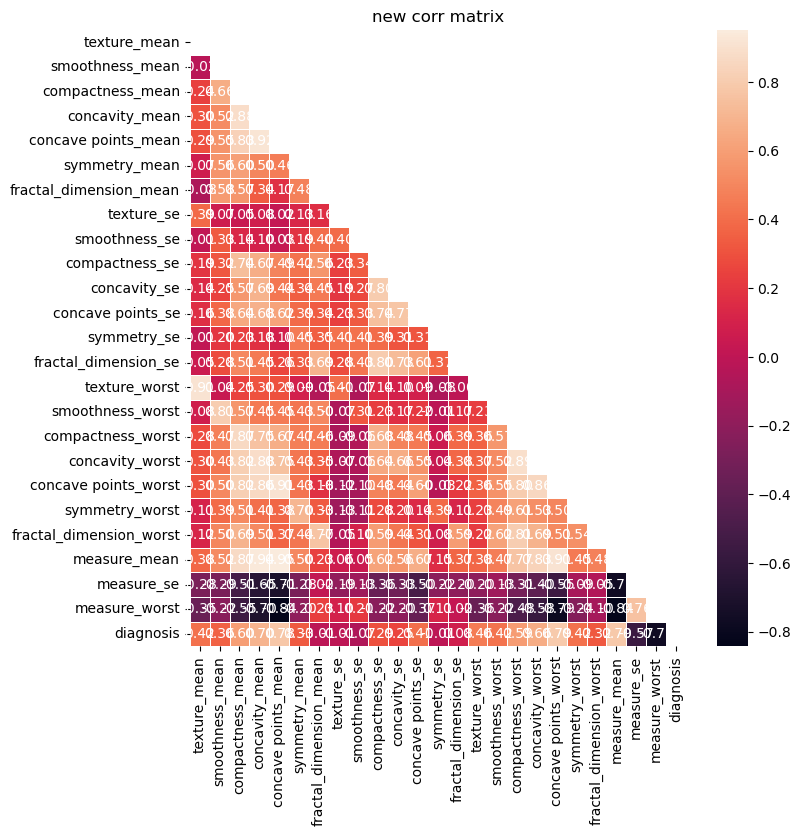

In [ ]:
# PCA dimensionality reduction -> easier to train model with less dimensions 
# we could group variables 
def pca(data, dimension, plot = False):
    data = (data-data.mean())/data.std() #data has mean = 0 and sd = 1 -> goodfor pca so that mean is centered
    cov = np.cov(data.T)
    eig_val, eig_vec = np.linalg.eig(cov)
    indices = np.arange(0,len(eig_val), 1)
    indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
    eig_val = eig_val[indices]
    eig_vec = eig_vec[:,indices]
    sum_eig_val = np.sum(eig_val)
    if plot:
        explained_variance = eig_val/ sum_eig_val
        plot_pca(explained_variance)
    pca_data = np.dot(data, eig_vec[:,0:dimension])
    return pca_data

def plot_pca(explained_variance):
    plt.figure(figsize=(6, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='b')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Principal Components')
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.show()
    
measure_mean = pca(x[column_mean], 1, True)
measure_se = pca(x[column_se], 1, True)
measure_worst = pca(x[column_worst], 1, True)
measure_mean = pca(x, 1, True)

columns_to_drop = column_mean + column_se + column_worst
new_data = x.drop(labels=columns_to_drop, axis=1)
new_data['measure_mean'] = measure_mean
new_data['measure_se'] = measure_se
new_data['measure_worst'] = measure_worst
correlation_matrix(new_data, y,  'new corr matrix')

Lossy compression means storing thepoints in a way that requires less memory but may lose some precision. We wantto lose as little precision as possible. (Goodfellow)

https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598 -> to build pca

since theh first component of the pca explains most of the variance it is acceptable to compress the data of mean_area, mean_perimeter and mean radius in to one variable

https://builtin.com/data-science/step-step-explanation-principal-component-analysis good explanations

https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization/notebook some of the information comes from here